


#  Task 1 Introduction : Transportation,  Cycle Infrastructure by Length

**Greater Dublin Area Cycle Infrastructure in Ireland**

https://data.gov.ie/dataset/greater-dublin-area-cycle-infrastructure-nta
This dataset contains cycle infrastructure in the Greater Dublin Area (GDA). Data stems from work undertaken on behalf of the NTA to:
re-categorise the 2013 street survey with infrastructure types: segregated cycle track, bus lane with cycle lane, etc.
include links inputted by the NTA in the course of developing and maintaining the journey planner
include NTA funded completed cycle infrastructure 2013-2021

Licensed under: Creative Commons Attribution 4.0

data.gov.ie
--------------------------------

------------------------------

**Cycle Facility Network in NZ**

https://catalogue.data.govt.nz/dataset/cycle-facility-network3/resource/b1219489-860d-4017-8328-abf1db6e91f1
The Auckland Cycle Network (ACN) provides a plan for the development of and investment in a comprehensive 
cycle network for the region.

Licensed under: CC-BY 4.0 International licence details

data.govt.nz
------------

---------------------------

GITHUB LINK: https://github.com/Johanna23cct/-Users-of-Cars-Involved-in-Fatal-and-Injury-Collisions.git


#  Task 2 Setup and imports libraries

In [1]:
# Importing some libraries:
import pandas as pd
import statistics as stats
import numpy as np
import csv

# import some libraries for Visualising the price variable:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline



# Import the library for normalization of the data
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=42)
from sklearn.tree import DecisionTreeRegressor

#  Task 3 importing data and EDA
Read data from csv.
Shape. 
Drop unnecessary columns. 
add sentiment.
Calculation of Polarity summary statistics Descriptive

In [2]:
dfI = pd.read_csv('Cycle_Facility_Network.csv')
dfI.head()

,OBJECTID,IDENTIFIER,ROUTEFUNCTION,ROADNAME,STATUS,CONSTRUCTIONYEAR,LOCALBOARD,VEHICLESPEEDLIMIT,TRAFFICAADT,TYPEOFFACILITY,JOURNEYCORRIDOR,Shape__Length
0,1,1.0,NaN,Bay connection,Existing,NaN,Howick,NaN,NaN,Off-road shared path,NaN,5.746521
1,2,1.0,NaN,Bay connection,Existing,NaN,Howick,NaN,NaN,Off-road shared path,NaN,963.546209
2,3,1.0,NaN,Bay connection,Existing,NaN,Howick,NaN,NaN,Off-road shared path,NaN,415.740382
3,4,3.0,NaN,Rosedale Park North,Existing,NaN,Upper Harbour,NaN,NaN,Local area traffic management,NaN,110.928884
4,5,3.0,NaN,Rosedale Park North,Existing,NaN,Upper Harbour,NaN,NaN,Off-road shared path,NaN,685.221694


In [3]:
# dfI.info()

In [4]:
# To Drop one duplicate row TLIST(A1)	Year
to_drop = ['OBJECTID', 'IDENTIFIER', 'ROUTEFUNCTION', 'CONSTRUCTIONYEAR', 'VEHICLESPEEDLIMIT', 'TRAFFICAADT', 'JOURNEYCORRIDOR' ]
dfI.drop(columns=to_drop, inplace=True)
dfI.head()

,ROADNAME,STATUS,LOCALBOARD,TYPEOFFACILITY,Shape__Length
0,Bay connection,Existing,Howick,Off-road shared path,5.746521
1,Bay connection,Existing,Howick,Off-road shared path,963.546209
2,Bay connection,Existing,Howick,Off-road shared path,415.740382
3,Rosedale Park North,Existing,Upper Harbour,Local area traffic management,110.928884
4,Rosedale Park North,Existing,Upper Harbour,Off-road shared path,685.221694


In [5]:
dfI.rename(columns={'Shape__Length': 'Shape__Length IE'}, inplace=True)
dfI.head()

,ROADNAME,STATUS,LOCALBOARD,TYPEOFFACILITY,Shape__Length IE
0,Bay connection,Existing,Howick,Off-road shared path,5.746521
1,Bay connection,Existing,Howick,Off-road shared path,963.546209
2,Bay connection,Existing,Howick,Off-road shared path,415.740382
3,Rosedale Park North,Existing,Upper Harbour,Local area traffic management,110.928884
4,Rosedale Park North,Existing,Upper Harbour,Off-road shared path,685.221694


In [6]:
dfI.shape

(1542, 5)

# ----

In [7]:
dfNZ = pd.read_csv('dublin_bikelife_210817.csv')
dfNZ.head()

,Route_No,Comments_1,Shape_Leng,cdo,twoway,sruface_ch,bollardpro,temporary,mandatory,width,...,trafficfre,signedrout,oneside,twoway_sin,oneplus,review,difference,gid,MERGE_SRC,Shape_Le_1
0,1-1,NaN,172.522128,SegregatedCycleLane,0,0,1,0,1,1.2,...,0,0,0,0,0,0,0,0,Dublin_BikeLife_210813_Jacobs,172.522128
1,1-2,NaN,261.891707,SegregatedCycleLane,1,0,1,0,1,3.7,...,0,0,0,0,0,0,0,0,Dublin_BikeLife_210813_Jacobs,261.891707
2,1-3,NaN,108.076912,CycleLane,0,0,0,0,1,1.9,...,0,0,0,0,0,0,0,0,Dublin_BikeLife_210813_Jacobs,108.076912
3,1-4,NaN,78.613318,SegregatedCycleLane,0,0,1,0,1,1.9,...,0,0,0,0,0,0,0,0,Dublin_BikeLife_210813_Jacobs,78.613318
4,1-5,NaN,141.048015,BusLane,0,0,0,0,0,3.7,...,0,0,0,0,0,0,0,0,Dublin_BikeLife_210813_Jacobs,141.048015


In [8]:
# dfNZ.info()

In [9]:
# To Drop one duplicate row TLIST(A1)	Year
to_drop = ['Comments_1', 'Shape_Leng', 'twoway', 'sruface_ch', 'bollardpro', 'temporary', 'mandatory', 'width', 'trafficfre', 'signedrout', 'oneside', 'twoway_sin', 'oneplus', 'review', 'difference', 'gid', 'surface_ch', 'buslane', 'OBJECTID', 'datasource', 'classifica', 'classifi_1', 'cyclelane', 'shareduse', 'segregated' ]
dfNZ.drop(columns=to_drop, inplace=True)
dfNZ.head()

,Route_No,cdo,MERGE_SRC,Shape_Le_1
0,1-1,SegregatedCycleLane,Dublin_BikeLife_210813_Jacobs,172.522128
1,1-2,SegregatedCycleLane,Dublin_BikeLife_210813_Jacobs,261.891707
2,1-3,CycleLane,Dublin_BikeLife_210813_Jacobs,108.076912
3,1-4,SegregatedCycleLane,Dublin_BikeLife_210813_Jacobs,78.613318
4,1-5,BusLane,Dublin_BikeLife_210813_Jacobs,141.048015


In [10]:
dfNZ.shape

(5636, 4)

**


In [11]:
dfNZ.rename(columns={'Shape_Le_1': 'Shape__Length NZ'}, inplace=True)
dfNZ.head()

,Route_No,cdo,MERGE_SRC,Shape__Length NZ
0,1-1,SegregatedCycleLane,Dublin_BikeLife_210813_Jacobs,172.522128
1,1-2,SegregatedCycleLane,Dublin_BikeLife_210813_Jacobs,261.891707
2,1-3,CycleLane,Dublin_BikeLife_210813_Jacobs,108.076912
3,1-4,SegregatedCycleLane,Dublin_BikeLife_210813_Jacobs,78.613318
4,1-5,BusLane,Dublin_BikeLife_210813_Jacobs,141.048015


In [12]:
dfNZ.tail()

,Route_No,cdo,MERGE_SRC,Shape__Length NZ
5631,NaN,CycleLane,Dublin_BikeLife_210625_Jacobs,736.147520
5632,NaN,CycleLane,Dublin_BikeLife_210625_Jacobs,648.992720
5633,NaN,TrafficFree,Dublin_BikeLife_210625_Jacobs,456.366007
5634,NaN,TrafficFree,Dublin_BikeLife_210625_Jacobs,112.858520
5635,NaN,SegregatedCycleLane,Dublin_BikeLife_210625_Jacobs,751.762409


In [13]:
print(dfI['Shape__Length IE']) #IE

0          5.746521
1        963.546209
2        415.740382
3        110.928884
4        685.221694
           ...     
1537     280.329822
1538    1314.740577
1539      82.583260
1540     153.894935
1541      56.655550
Name: Shape__Length IE, Length: 1542, dtype: float64


In [14]:
print(dfNZ['Shape__Length NZ']) #NZ

0       172.522128
1       261.891707
2       108.076912
3        78.613318
4       141.048015
           ...    
5631    736.147520
5632    648.992720
5633    456.366007
5634    112.858520
5635    751.762409
Name: Shape__Length NZ, Length: 5636, dtype: float64


In [15]:
dfI.describe()

,Shape__Length IE
count,1542.000000
mean,443.905213
std,556.762057
min,0.011265
25%,107.427329
50%,253.905857
75%,570.517557
max,4884.670418


In [16]:
dfNZ.describe()

,Shape__Length NZ
count,5636.000000
mean,117.847005
std,184.526130
min,0.075140
25%,33.823079
50%,66.855330
75%,132.033852
max,5677.287194


In [17]:
# Finding specific statistics such as the mean:
mean_adm = dfI['Shape__Length IE'].mean()
print(round(mean_adm, 2))

443.91


In [18]:
# Finding specific statistics such as the mean:
mean_adm = dfNZ['Shape__Length NZ'].mean()
print(round(mean_adm, 2))

117.85


In [21]:
# And the median:
median = dfI['443.91'].median()
print(median)

253.9058574993035


In [22]:
# And the median:
median = dfNZ['Shape__Length NZ'].median()
print(median)

66.85532970220001


In [23]:
# (Finding the mode...? Not appropriate here)
# mode = dataset['Shape__Length **'].mode()
# print(mode)

[Text(0.5, 0, 'Shape'),
 Text(0, 0.5, 'NZ_BikeLife'),
 Text(0.5, 1.0, 'Shape__Length NZ Histogram')]

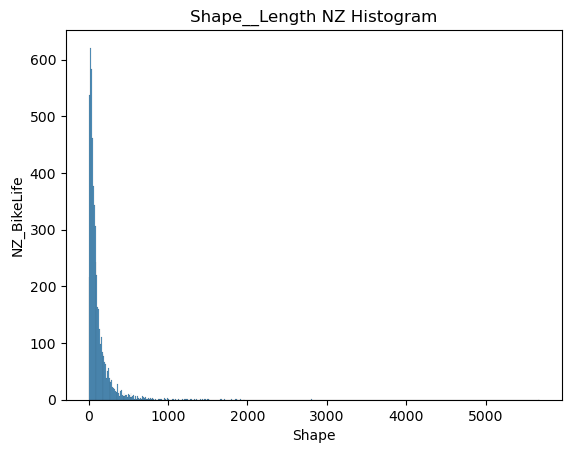

In [29]:
# Producing a histodatasetgram:
ax = sns.histplot(dfNZ['Shape__Length NZ'])
ax.set(xlabel='Shape',
       ylabel='NZ_BikeLife',
       title ='Shape__Length NZ Histogram')

[Text(0.5, 0, 'Shape'),
 Text(0, 0.5, 'Dublin_BikeLife'),
 Text(0.5, 1.0, 'Shape__Length IE Histogram')]

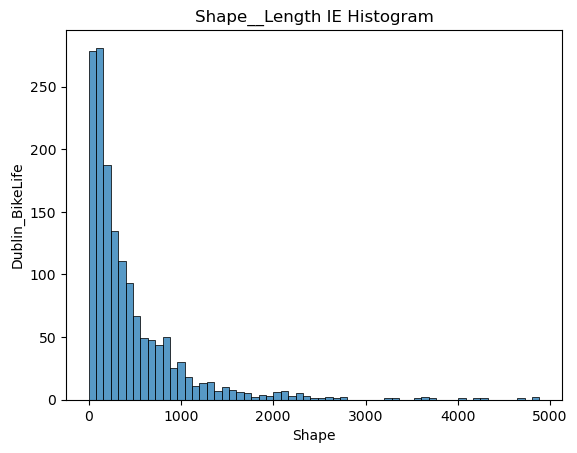

In [30]:
# Producing a histogram:
ax = sns.histplot(dfI['Shape__Length IE'])
ax.set(xlabel='Shape',
       ylabel='Dublin_BikeLife',
       title ='Shape__Length IE Histogram')

[Text(0.5, 0, 'Shape'),
 Text(0, 0.5, 'NZ_BikeLife'),
 Text(0.5, 1.0, 'Length NZ')]

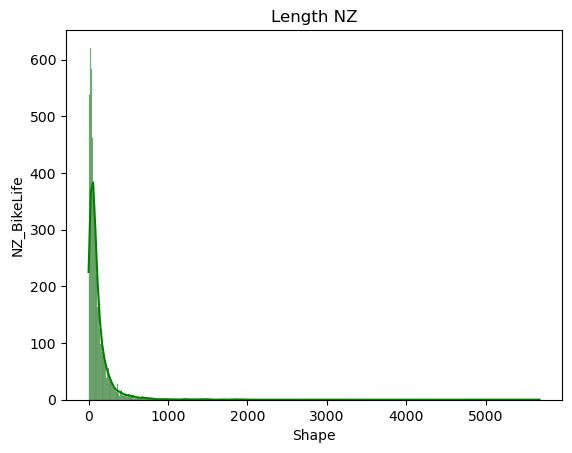

In [31]:
# Changing some of the aesthetics... adding in a kernel desnity estimate:
ax = sns.histplot(dfNZ['Shape__Length NZ'], kde=True, color ='green')
ax.set(xlabel='Shape',
       ylabel='NZ_BikeLife',
       title ='Length NZ')

Text(0.5, 1.0, 'Boxplot of Shape__Length NZ')

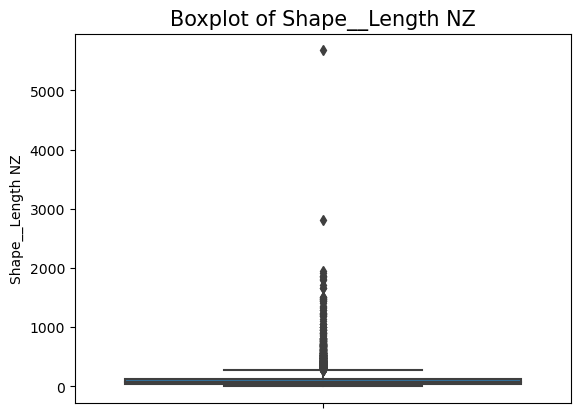

In [32]:
sns.boxplot(y ='Shape__Length NZ',
             data=dfNZ)
plt.title('Boxplot of Shape__Length NZ',
           fontsize=15)


In [48]:
# Define the range of 'Shape_length' values in each dataset  dfI and dfNZ

short_threshold_IE = 107.427329
long_threshold_IE = 570.517557

# Define the thresholds for each sentiment label
short_threshold = 556.762057
medium_threshold = 443.91



In [49]:
# Define the sentiment labels based on the range of 'Shape_length' values
def assign_sentiment_label_IE(shape_length_IE):
    if shape_length_IE < short_threshold_IE:
        return "short"
    elif shape_length_IE < long_threshold_IE:
        return "medium"
    else:
        return "long"


In [52]:
# Example usage:
shape_length_value_IE = 250 
sentiment_label_IE = assign_sentiment_label_IE(shape_length_value_IE)
print("Sentiment label for 'IE' dataset:", sentiment_label_IE)
dfI.head()

Sentiment label for 'IE' dataset: medium


,ROADNAME,STATUS,LOCALBOARD,TYPEOFFACILITY,Shape__Length IE
0,Bay connection,Existing,Howick,Off-road shared path,5.746521
1,Bay connection,Existing,Howick,Off-road shared path,963.546209
2,Bay connection,Existing,Howick,Off-road shared path,415.740382
3,Rosedale Park North,Existing,Upper Harbour,Local area traffic management,110.928884
4,Rosedale Park North,Existing,Upper Harbour,Off-road shared path,685.221694


In [11]:
# Initialize an empty set to collect unique sentiment values
unique_sentiments = set()

# Iterate over each list in the 'Sentiment' column and collect unique values
for sentiment_list in df['Sentiment']:
    unique_sentiments.update(sentiment_list)

# Print out the unique sentiment values
print(unique_sentiments)


{0, 1, -1}


In [12]:
df['Polarity_Rating'] = df['Sentiment'].apply(lambda x: 'Positive' if x == 1 else ('Neutral' if x == 0 else 'Negative'))

In [13]:
df.head()

,STATISTIC,Statistic Label,Year,Seat Belt,UNIT,VALUE,Sentiment,Polarity_Rating
0,ROA23C1,Users of Cars Killed in Collisions,2005,Car drivers: seat belt in use,Number,55.0,[1],Negative
1,ROA23C1,Users of Cars Killed in Collisions,2005,Car drivers: seat belt not in use,Number,38.0,[-1],Negative
2,ROA23C1,Users of Cars Killed in Collisions,2005,Car drivers: seat belt usage unknown,Number,37.0,[0],Negative
3,ROA23C1,Users of Cars Killed in Collisions,2005,Car drivers: seat belt usage not stated,Number,14.0,[-1],Negative
4,ROA23C1,Users of Cars Killed in Collisions,2005,All car drivers,Number,144.0,[1],Negative


**Plot the Rating visualization graph**

<Axes: xlabel='Polarity_Rating', ylabel='count'>

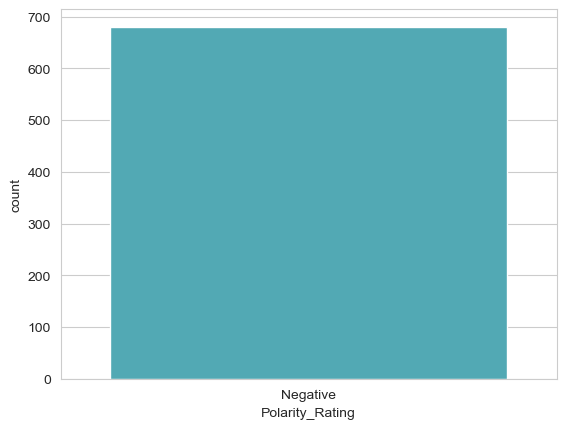

In [19]:
sns.set_style('whitegrid')
sns.countplot(x='Polarity_Rating',data=df, palette='YlGnBu_r')

**Plot the Polarity Rating count**

<Axes: xlabel='Polarity_Rating', ylabel='count'>

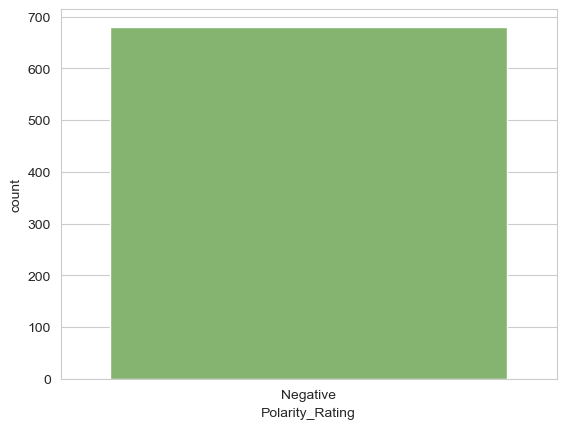

In [15]:
sns.set_style('whitegrid')
sns.countplot(x='Polarity_Rating',data=df, palette='summer')

**Data Preprocessing**

In [28]:
df_Positive = df[df['Polarity_Rating'] == 'Positive'][0:1]
df_Neutral = df[df['Polarity_Rating'] == 'Neutral']
df_Negative = df[df['Polarity_Rating'] == 'Negative']

**Sample negative and neutral polarity dataset and create final dataframe**

In [29]:
df_Neutral_over = df_Neutral.sample(0, replace=True)
df_Negative_over = df_Negative.sample(0, replace=True)
df = pd.concat([df_Positive, df_Neutral_over, df_Negative_over], axis=0)

**Text Preprocessing**

In [30]:
def get_text_processing(text):
    stpword = stopwords.words('english')
    no_punctuation = [char for char in text if char not in string.punctuation]
    no_punctuation = ''.join(no_punctuation)
    return ' '.join([word for word in no_punctuation.split() if word.lower() not in stpword])

**Apply the method "get_text_processing" into column review text**

In [31]:
df['review'] = df['Review Text'].apply(get_text_processing)
df.head()

KeyError: 'Review Text'

**Visualize Text Review with Polarity Rating**

In [26]:
df = df[['review', 'Polarity_Rating']]
df.head()

KeyError: "['review'] not in index"

**Apply One hot encoding on negative, neutral, and positive**

In [32]:
one_hot = pd.get_dummies(df["Polarity_Rating"])
df.drop(['Polarity_Rating'],axis=1,inplace=True)
df = pd.concat([df,one_hot],axis=1)
df.head()

,STATISTIC,Statistic Label,Year,Seat Belt,UNIT,VALUE,Sentiment


**Apply Train Test Split**

In [34]:
X = df['review'].values
y = df.drop('review', axis=1).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

KeyError: 'review'

**Apply vectorization**

In [ ]:
vect = CountVectorizer()
X_train = vect.fit_transform(X_train)
X_test = vect.transform(X_test)

**Apply frequency, inverse document frequency:**

In [35]:
tfidf = TfidfTransformer()
X_train = tfidf.fit_transform(X_train)
X_test = tfidf.transform(X_test)
X_train = X_train.toarray()
X_test = X_test.toarray()

NameError: name 'TfidfTransformer' is not defined

**Add different layers**

In [ ]:
model = Sequential()

model.add(Dense(units=12673,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=4000,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=500,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=3, activation='softmax'))

opt=tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

#early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=2)

In [ ]:
**Fit the Model**

In [36]:
model.fit(x=X_train, y=y_train, batch_size=256, epochs=100, validation_data=(X_test, y_test), verbose=1, callbacks=early_stop)

NameError: name 'model' is not defined

**Evaluation of Model**

In [38]:
model_score = model.evaluate(X_test, y_test, batch_size=64, verbose=1)
print('Test accuracy:', model_score[1])

NameError: name 'model' is not defined

In [39]:
**Prediction**

SyntaxError: invalid syntax (2495207704.py, line 1)

In [ ]:
preds = model.predict(X_test)
preds

In [37]:
preds.shape

NameError: name 'preds' is not defined

In [12]:
df['Polarity_Rating'] = df['sentiment'].apply(lambda x: 'Positive' if x == 1 else('Neutral' if x == 0  else 'Negative'))

KeyError: 'sentiment'

In [10]:
print(df['Seat Belt'].head())

0              Car drivers: seat belt in use
1          Car drivers: seat belt not in use
2       Car drivers: seat belt usage unknown
3    Car drivers: seat belt usage not stated
4                            All car drivers
Name: Seat Belt, dtype: object


In [11]:
def analyze_seat_belt_sentiment(text):
    # Convert the text to lowercase for easier matching
    text = text.lower()
    
    # Assign sentiment based on the content of the text
    if "in use" in text:
        return "Positive"
    elif "not in use" in text or "unknown" in text or "not stated" in text:
        return "Negative"
    else:
        return "Neutral"

# Apply sentiment analysis function to each row in the "Seat Belt" column
df['SeatBelt_Sentiment'] = df['Seat Belt'].apply(analyze_seat_belt_sentiment)
df.head()

,STATISTIC,Statistic Label,Year,Seat Belt,UNIT,VALUE,SeatBelt_Sentiment
0,ROA23C1,Users of Cars Killed in Collisions,2005,Car drivers: seat belt in use,Number,55.0,Positive
1,ROA23C1,Users of Cars Killed in Collisions,2005,Car drivers: seat belt not in use,Number,38.0,Positive
2,ROA23C1,Users of Cars Killed in Collisions,2005,Car drivers: seat belt usage unknown,Number,37.0,Negative
3,ROA23C1,Users of Cars Killed in Collisions,2005,Car drivers: seat belt usage not stated,Number,14.0,Negative
4,ROA23C1,Users of Cars Killed in Collisions,2005,All car drivers,Number,144.0,Neutral


In [12]:
# Group the DataFrame by sentiment and count the occurrences of each sentiment
sentiment_counts = df['SeatBelt_Sentiment'].value_counts()



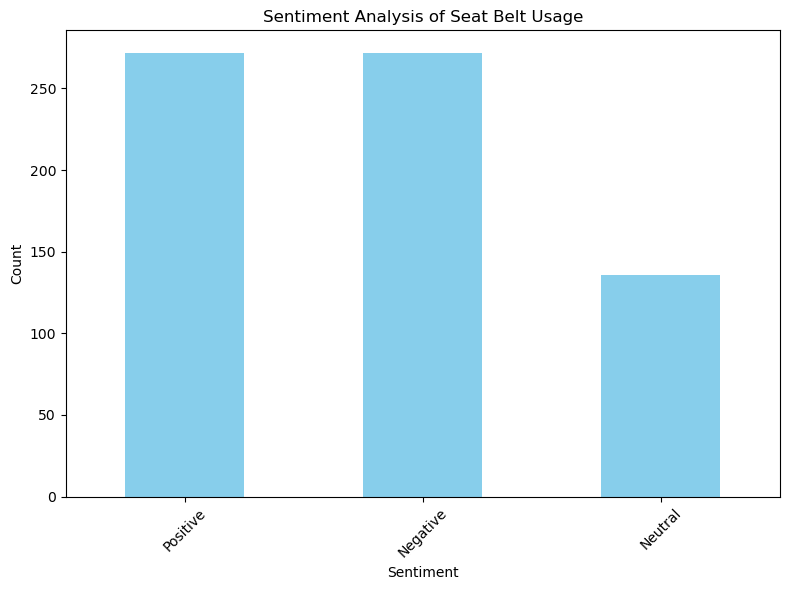

In [13]:
# Create a bar plot
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color='skyblue')
plt.title('Sentiment Analysis of Seat Belt Usage')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [11]:
df['Sentiment'] = df['SeatBelt_Sentiment']

KeyError: 'SeatBelt_Sentiment'

In [12]:
print(df['SeatBelt_Sentiment'])

KeyError: 'SeatBelt_Sentiment'

In [ ]:
df.dropna()

In [ ]:
def analyze_seat_belt_sentiment(text):
    # Convert the text to lowercase for easier matching
    text = text.lower()
    
    # Assign sentiment based on the content of the text
    if "in use" in text or "All car drivers" in text:
        return "Positive"
    elif "not in use" in text or "unknown" in text or "not stated" in text:
        return "Negative"
    else:
        return "Neutral"
df['SeatBelt_Sentiment'] = df['Seat Belt'].apply(analyze_seat_belt_sentiment)
(df.head())

In [9]:
df.describe()

,Year,VALUE
count,680.000000,595.000000
mean,2013.000000,880.877311
std,4.902586,1424.144822
min,2005.000000,0.000000
25%,2009.000000,18.000000
50%,2013.000000,145.000000
75%,2017.000000,1194.000000
max,2021.000000,7837.000000


In [ ]:
# create a sample DataFrame
df = pd.DataFrame({'categorical_variable': ['Statistic Label', 'Year', 'Seat Belt Usage', 'VALUE']})

In [ ]:
value_counts = df['categorical_variable'].value_counts()

In [ ]:
print(value_counts)

In [8]:
# summary of the dataset: 608 rows, 8 columns, no null values
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 680 entries, 0 to 679
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   STATISTIC           680 non-null    object 
 1   Statistic Label     680 non-null    object 
 2   Year                680 non-null    int64  
 3   Seat Belt           680 non-null    object 
 4   UNIT                680 non-null    object 
 5   VALUE               595 non-null    float64
 6   SeatBelt_Sentiment  680 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 37.3+ KB
None


In [ ]:
#Prints the minimum value of all the elements in a
a = np.array([df])
print(a.min())
print(a.max())
print(a.sum())

In [ ]:
# Mean
numeric_data = df["Year"]
if numeric_data.dtype == 'int64' or numeric_data.dtype == 'float64':
    mean = numeric_data.mean()
    mean_rounded = round(mean, 2)
    print('Mean:', mean_rounded)
else:
    print("The selected column does not contain numeric data")

In [ ]:
median = home["National"].median()
print('Median:', median)

In [ ]:
def analyze_sentiment(kms_driven, owner_type):
    # Perform sentiment analysis based on your criteria
    # This can be a simple rule-based approach, machine learning model, or any other method
    # For simplicity, let's assume a rule-based approach here
    sentiment_score = 0
    if kms_driven < 50000:
        sentiment_score += 1
    elif 50000 <= kms_driven < 100000:
        sentiment_score += 0.5
    if owner_type == "First":
        sentiment_score += 1
    elif owner_type == "Second":
        sentiment_score += 0.5
    # You can add more conditions or use a more sophisticated approach based on your requirements
    return sentiment_score

In [ ]:
df = df.drop(['Title', 'Positive Feedback Count', 'Unnamed: 0', ], axis=1)
df.dropna(inplace=True)